In [8]:
%matplotlib inline
#import nbs.utils; reload(nbs/utils)
#from utils import *
import matplotlib.pyplot as plt
import math,sys,os
import numpy as np
import numpy.random as rand
import tempfile
from matplotlib import rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)


from ahkab import new_ac, run, new_op, new_pz, new_tran, time_functions
from ahkab.circuit import Circuit
from ahkab.plotting import plot_results # calls matplotlib for you
from ahkab.netlist_parser import parse_circuit, parse_analysis

import ahkab

### Small-signal transfer function of various opamp configurations

![RLC Filter](./pictures/leaky_integrator.png)

In [10]:
(circ, directives, postproc_direct) = parse_circuit('ckts/leaky_integrator.ckt')
print("number of simulations: " + str(len(ahkab.netlist_parser.parse_analysis(circ, directives))))

an = parse_analysis(circ, directives)
for a in an:
  a['outfile']=tempfile.mktemp('')

print("Circuit description:")
print(circ)
print("\nTests:")
print(directives)


number of simulations: 3
Circuit description:
* * leaky integrator with finite gain
v1 in 0 type=vdc value=5.0 vac=1.0 
r1 in inv 1000
e1 out 0 0 inv 1e+06
c1 inv out 1e-12
r2 inv out 1000

Tests:
[('.symbolic tf=v1 ac=1', 9), ('.op', 10), ('.tran tstop=150n tstep=.1n method=trap uic=2', 11)]


In [23]:
res = run(circ, an)
print("#################################################\nResults: ")
print(res['op'])
print("#####################\n")

for x in res['symbolic']:
  print(x)

Starting symbolic AC analysis...
Building symbolic MNA, N and x...  done.
Building equations...
Solving...
Success!
Results:
Calculating small-signal symbolic transfer functions (V1))... done.
Small-signal symbolic transfer functions:
Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 9.9734e-11
#################################################
Results: 
OP simulation results for '* leaky integrator with finite gain'(netlist ckts/leaky_integrator.ckt).
Run on 2017-04-19 22:24:42, data file /tmp/tmpp6dx5e1h.
Variable    Units           Value         Error    %
----------  -------  ------------  ------------  ---
VIN         V         5            -5e-12          0
VINV        V         4.99999e-06  -4.61048e-18    0
VOUT        V        -4.99999       4.99

W: TRAN has x0 set to op, unavailable. Using 'None'.


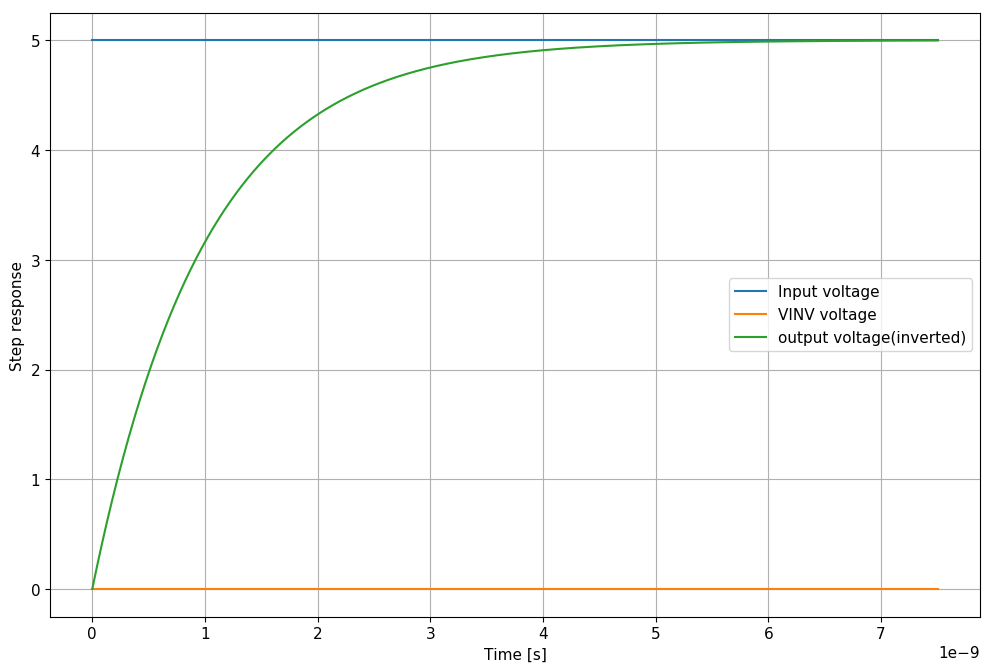

In [27]:
tran = ahkab.new_tran(tstart=0., tstop=7.5e-9, tstep=.01e-9, method='trap')
r = run(circ, tran)['tran']

plt.figure(figsize=[12,8],dpi=100)
# plt.title(cir.title + " - TRAN Simulation")
plt.plot(r['T'], r['VIN'], label="Input voltage")
plt.plot(r['T'], r['VINV'], label="VINV voltage")
plt.plot(r['T'], -r['VOUT'], label="output voltage(inverted)")
plt.legend()
plt.grid(True)
# plt.ylim([0,Vin*1.5])
plt.ylabel('Step response')
plt.xlabel('Time [s]')
